# loading the MNIST dataset

In [5]:
import keras
from keras.datasets import mnist

(X_train , y_train) , (X_test , y_test) = mnist.load_data()
print("mnist train dataset has a size of: %d" %len(X_train))
print("\nmnist test dataset has a seze of: %d" %len(X_test))

mnist train dataset has a size of: 60000

mnist test dataset has a seze of: 10000


# Visualizing the first 6 training images

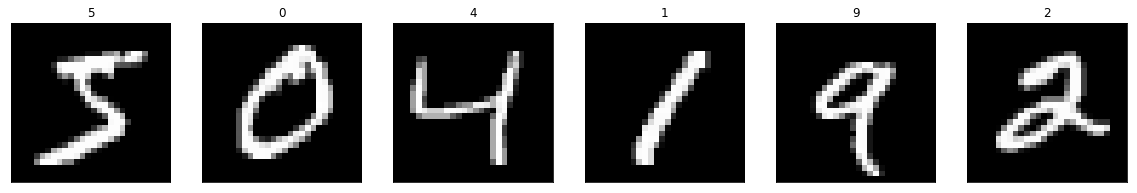

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline   
import matplotlib.cm as cm
import numpy as np

fig = plt.figure(figsize = (20 , 20))
for i in range(6):
  ax = fig.add_subplot(1 , 6 , i+1 , xticks=[] , yticks=[])
  ax.imshow(X_train[i] , cmap = 'gray')
  ax.set_title(str(y_train[i]))

# Rescaling the images in the MNIST dataset

In [0]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

# One_Hot incoding the labels

In [12]:
from keras.utils import np_utils

print("inteager valued labels: ")
print(y_train[:10])

y_train = np_utils.to_categorical(y_train , 10)
y_test = np_utils.to_categorical(y_test , 10)

print("\nOne-Hot encoded labels: ")
print(y_train[:10])

inteager valued labels: 
[5 0 4 1 9 2 1 3 1 4]

One-Hot encoded labels: 
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# Creating the architecture of neural **nets**

In [15]:
from keras.models import Sequential
from keras.layers import Dense , Flatten , Dropout

model = Sequential()
model.add(Flatten(input_shape = X_train.shape[1:]))
model.add(Dense(512 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10 , activation = 'softmax'))

model.summary()

W0626 16:16:21.135888 140606249973632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0626 16:16:21.149903 140606249973632 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# **Compile the model**

In [19]:
model.compile(loss = 'categorical_crossentropy' , optimizer = 'rmsprop' , metrics = ['accuracy'])

score = model.evaluate(X_test , y_test , verbose = 0)
accuracy = 100*score[1]

print('test accuracy : %.4f%%' % accuracy)

test accuracy : 12.6200%


# **Validation set and finding the best model**

In [22]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'mnist.model.best.hdf5' , verbose = 1 , save_best_only = True)

hist = model.fit(X_train , y_train , batch_size = 128 , epochs = 10 , validation_split = 0.2 , callbacks = [checkpointer] , verbose = 1 , shuffle = True)


W0626 19:07:03.058574 140606249973632 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 165us/step - loss: 0.9541 - acc: 0.7014 - val_loss: 0.4881 - val_acc: 0.8393

Epoch 00001: val_loss improved from inf to 0.48806, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 8s 158us/step - loss: 0.4176 - acc: 0.8742 - val_loss: 0.3156 - val_acc: 0.9064

Epoch 00002: val_loss improved from 0.48806 to 0.31563, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 7s 155us/step - loss: 0.3252 - acc: 0.9033 - val_loss: 0.2577 - val_acc: 0.9234

Epoch 00003: val_loss improved from 0.31563 to 0.25774, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 7s 154us/step - loss: 0.2691 - acc: 0.9194 - val_loss: 0.2172 - val_acc: 0.9350

Epoch 00004: val_loss improved from 0.25774 to 0.21725, saving model to mnist.model.best.hdf5
Epoch 5/10
48000/48000

# **Load model weights**

In [0]:
model.load_weights('mnist.model.best.hdf5')

# **Testing the trained model on the test set**

In [25]:
score = model.evaluate(X_test , y_test , verbose = 0)
accuracy = 100*score[1]

print('test accuracy: %.4f%%' %accuracy)

test accuracy: 96.4300%
